## <font color='beige'>  Machine Learning Mini Project : Meryem Mrabet - Mouwafak Alioui</font>

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download


### <font color='pink'>  Theme : Credit Card Fraud Detection (Classification)</font>

#### 
Source: Kaggle

Type: Binary (Fraud or Not)

Samples: 284,807 transactions

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

<font size = 3 >It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


It consists of a:

- Time feature, which is seconds since the first transaction in the dataset

- V1 - V28 features, which are the numeric features obtained from Principal Component Analysis and used for prediction

- Amount feature, which is the transaction amount

- Class feature, which is 1 if the transaction is fraud, and 0 if not

The Kaggle posting suggests to use the Area Under the Precision-Recall Curve (AUPRC) as a metric because of how imbalanced the data is.</font>

### <font color='pink'> Exploratory data analysis</font>

#### Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  datasets, linear_model, metrics, model_selection, preprocessing, neighbors,tree,ensemble,svm 

#### Dataset

In [2]:
Data = pd.read_csv('creditcard.csv')

In [3]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
Data.isnull().sum() # not null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Visualisation

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

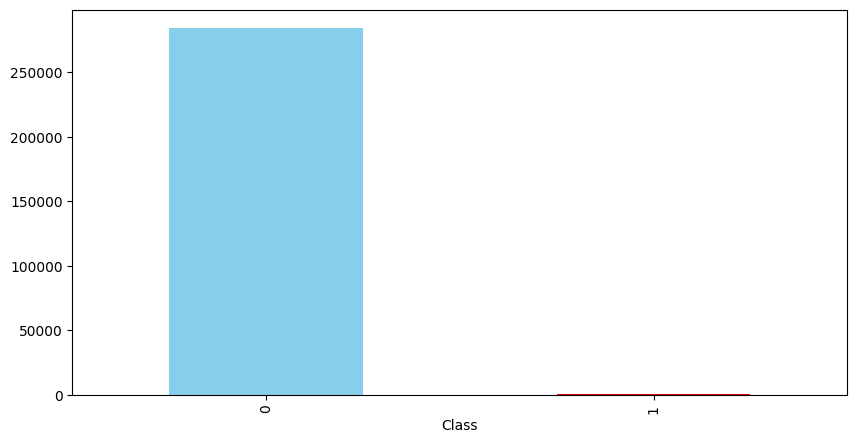

In [8]:
Data['Class'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'red'])
Data['Class'].value_counts(normalize=True) * 100

In [9]:
Data['Amount'].shape

(284807,)

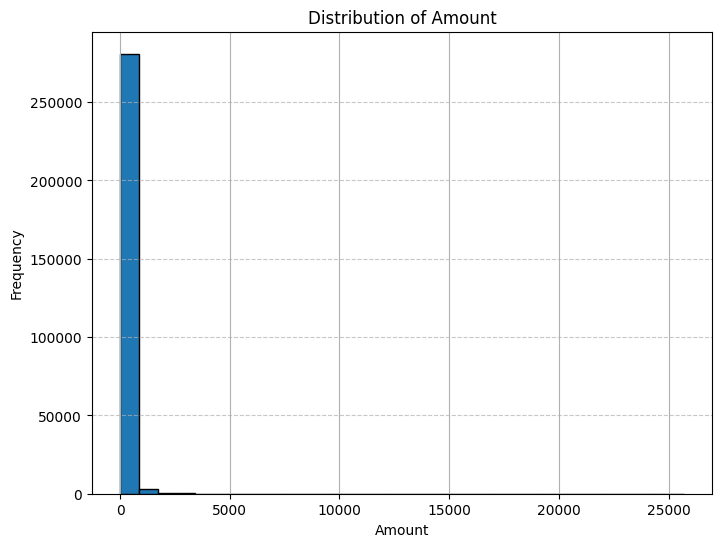

In [10]:
plt.figure(figsize=(8, 6))
Data['Amount'].hist(bins=30, edgecolor='black')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show() 

#### Data Cleaning

In [11]:
# Drop 'Time' column because it's not necessary in our prediction.
data = Data.drop(['Time'], axis=1)

In [12]:
num_duplicates = data.duplicated().sum()
num_duplicates

9144

In [13]:
data = data.drop_duplicates(keep='first')

In [14]:
num_duplicates = data.duplicated().sum()
num_duplicates

0

#### Analysis

<Axes: >

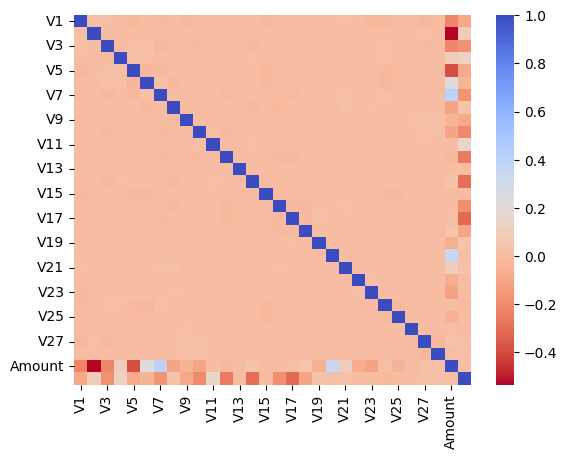

In [15]:
corr = data.corr() 
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In [16]:
standard_scaler = preprocessing.StandardScaler() # choose to use standard scaler because of large range of values
# Standardize the 'Amount' column
data['Amount'] = standard_scaler.fit_transform(data['Amount'].values.reshape((-1, 1)))

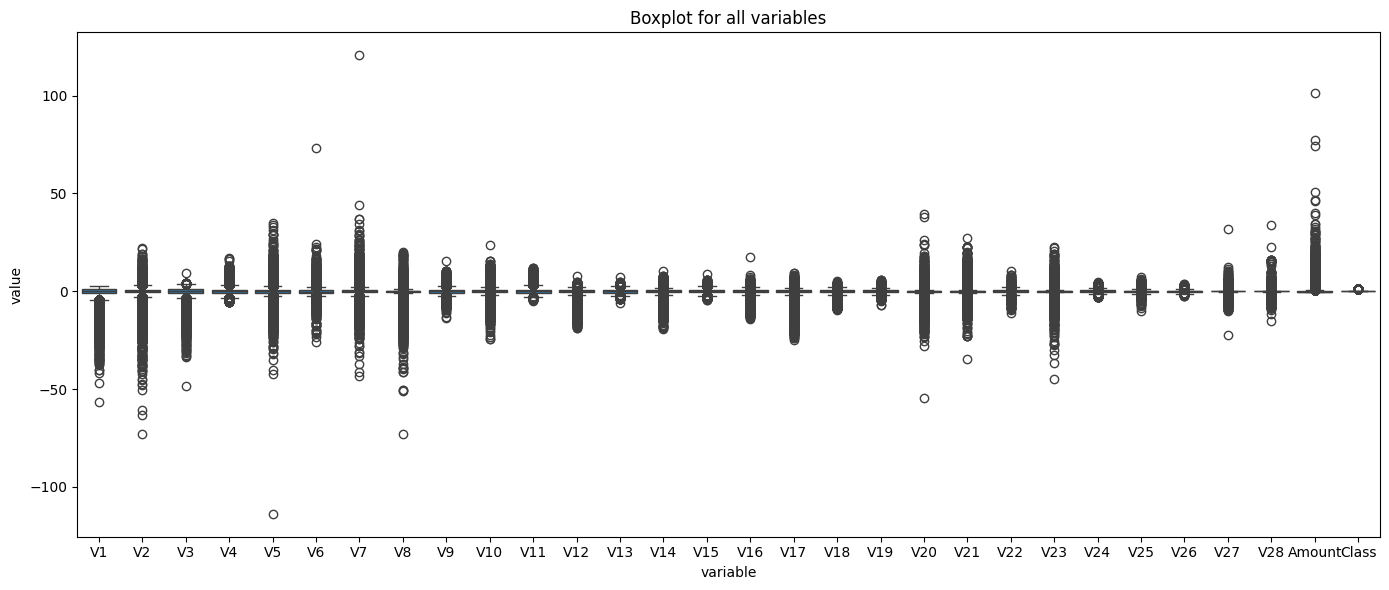

In [17]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(data))	
plt.title('Boxplot for all variables')
plt.tight_layout()
plt.show()

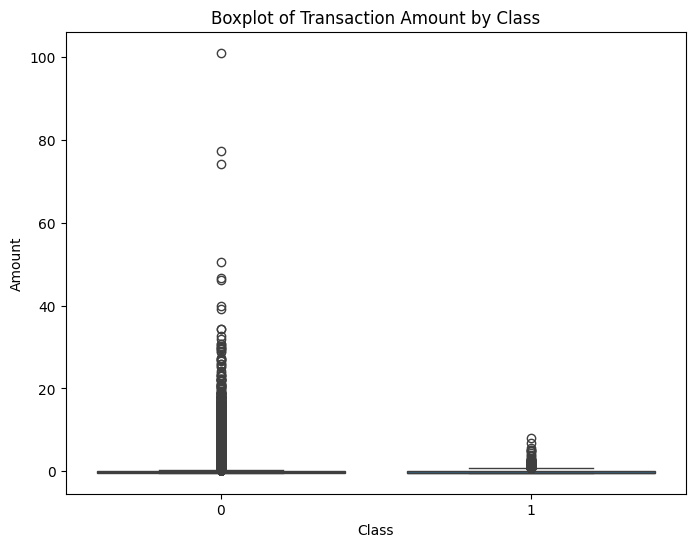

In [18]:
# Boxplot: Amount distribution by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Transaction Amount by Class')
plt.show()

## Training

In [19]:
Data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
X = data.drop(['Class'],axis=1)
y = data['Class']

print(X.shape, y.shape)

(275663, 29) (275663,)


### <font color='pink'> Baseline Modeling </font>

#### Dataset splitting Train/Test

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, test_size=0.2,random_state=40,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220530, 29), (55133, 29), (220530,), (55133,))

#### Logistic Regression


In [46]:
c=linear_model.LogisticRegression()
c.fit(X_train, y_train)
c_pred = c.predict(X_test)

In [47]:
metrics.accuracy_score(y_test, c_pred) #The accuracy of the model is 99.9%, is not useful for imbalanced data, 
                                        #as it can be misleading since the model can predict the majority class (True Negatives)
                                        #well but fail to predict the minority class(True Positives) accurately. 

0.9992019298786571

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, c_pred)
confusion_matrix

array([[55026,    12],
       [   32,    63]], dtype=int64)

In [49]:
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, c_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.84
Recall: 0.6631578947368421
F1 Score: 0.7411764705882353


#### RandomForest


In [ ]:
rf=ensemble.RandomForestClassifier(random_state=42,n_estimators=100,max_depth=5, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [51]:
rf_pred=rf.predict(X_test)

In [52]:
metrics.accuracy_score(rf_pred,y_test)

0.999492137195509

In [53]:
confusion_matrix = metrics.confusion_matrix(y_test, rf_pred)
confusion_matrix

array([[55034,     4],
       [   24,    71]], dtype=int64)

In [54]:
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, rf_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9466666666666667
Recall: 0.7473684210526316
F1 Score: 0.8352941176470589


#### SVM Classifier

In [55]:
svm_model = svm.SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [56]:
metrics.accuracy_score(y_test, svm_pred)

0.9994014474089928

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test, svm_pred)
confusion_matrix

array([[55035,     3],
       [   30,    65]], dtype=int64)

In [58]:
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, svm_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9558823529411765
Recall: 0.6842105263157895
F1 Score: 0.7975460122699386


### <font color='pink'> Model Enhancement</font>

Ensemble methods; Bagging, boosting, stacking

#### Bagging

In [68]:
bagging = ensemble.BaggingClassifier()
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
bagging_score = metrics.accuracy_score(y_pred, y_test)
print(f'Bagging score: {bagging_score}')


Bagging score: 0.9995646890247221


In [69]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix


array([[55035,     3],
       [   21,    74]], dtype=int64)

In [70]:
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.961038961038961
Recall: 0.7789473684210526
F1 Score: 0.8604651162790697


#### Boosting

In [71]:
boosting = ensemble.AdaBoostClassifier()
boosting.fit(X_train, y_train)
y_pred = boosting.predict(X_test)
boosting_score = metrics.accuracy_score(y_pred, y_test)
print(f'Boosting score: {boosting_score}')

Boosting score: 0.9990568262202311


In [72]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[55017,    21],
       [   31,    64]], dtype=int64)

In [73]:
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7529411764705882
Recall: 0.6736842105263158
F1 Score: 0.7111111111111111


#### Stacking

In [74]:
stacking = ensemble.StackingClassifier(estimators=[
    ('rf', ensemble.RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, n_jobs=-1))
], final_estimator=linear_model.LogisticRegression())
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
stacking_score = metrics.accuracy_score(y_pred, y_test)
print(f'Stacking score: {stacking_score}')

Stacking score: 0.999419585366296


In [75]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[55034,     4],
       [   28,    67]], dtype=int64)

In [76]:
precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9436619718309859
Recall: 0.7052631578947368
F1 Score: 0.8072289156626506


## <font color='pink'> Results Visualisation</font>

### Accuracy Scores


C:\Users\Mouwafak\AppData\Local\Temp\ipykernel_4392\1288059747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=models, y=scores, palette='viridis')


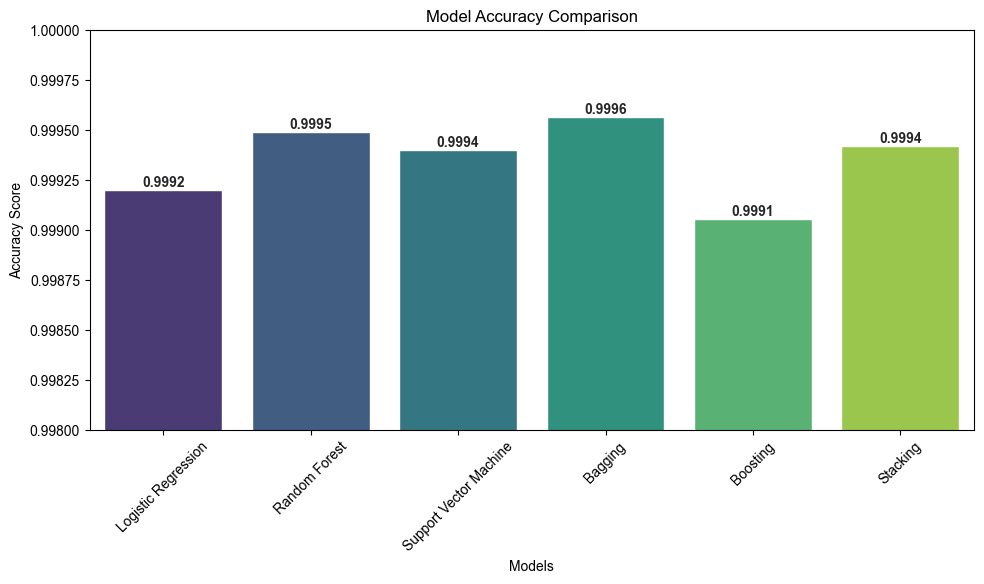

In [77]:
models = ['Logistic Regression', 
          'Random Forest',
          'Support Vector Machine',
          'Bagging',
          'Boosting',
          'Stacking']
scores = [
    metrics.accuracy_score(y_test, c.predict(X_test)),
    metrics.accuracy_score(y_test, rf.predict(X_test)),
    metrics.accuracy_score(y_test, svm_model.predict(X_test)),
    metrics.accuracy_score(y_test, bagging.predict(X_test)),
    metrics.accuracy_score(y_test, boosting.predict(X_test)),
    metrics.accuracy_score(y_test, stacking.predict(X_test))
]
plt.figure(figsize=(10, 6))
plt.ylim(0.998, 1)
sns.set(style='whitegrid')
bars = sns.barplot(x=models, y=scores, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')

# Attach accuracy values to each bar
for bar, score in zip(bars.patches, scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{score:.4f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

### F1 Scores

C:\Users\Mouwafak\AppData\Local\Temp\ipykernel_4392\2789746800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette='pastel')


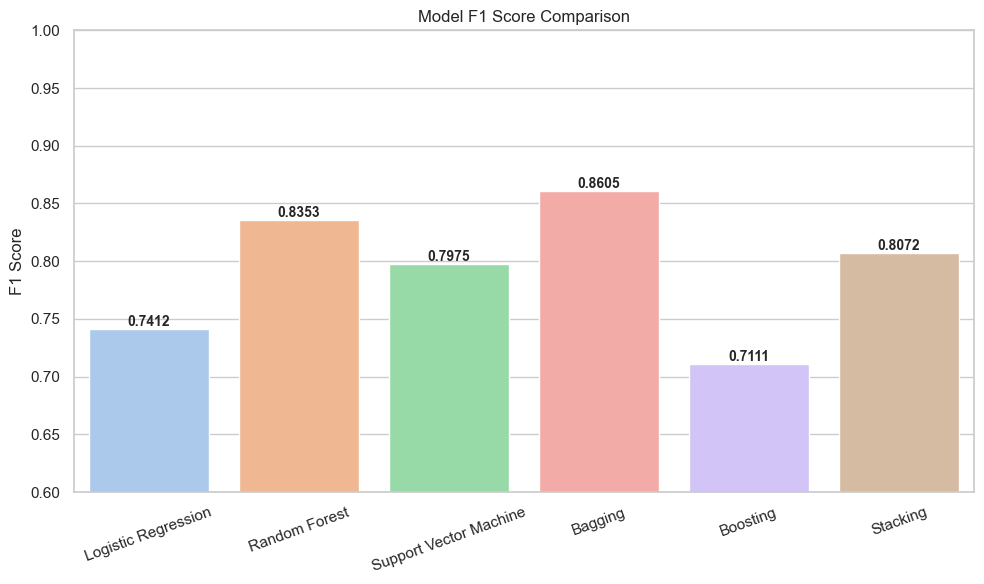

In [78]:
f1_scores = [
    metrics.f1_score(y_test, c.predict(X_test)),
    metrics.f1_score(y_test, rf.predict(X_test)),
    metrics.f1_score(y_test, svm_model.predict(X_test)),
    metrics.f1_score(y_test, bagging.predict(X_test)),
    metrics.f1_score(y_test, boosting.predict(X_test)),
    metrics.f1_score(y_test, stacking.predict(X_test))
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores, palette='pastel')
plt.ylim(0.6, 1)
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=20)

# Attach F1 score values to each bar
ax = plt.gca()
for bar, score in zip(ax.patches, f1_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{score:.4f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

### Confusion Matrix

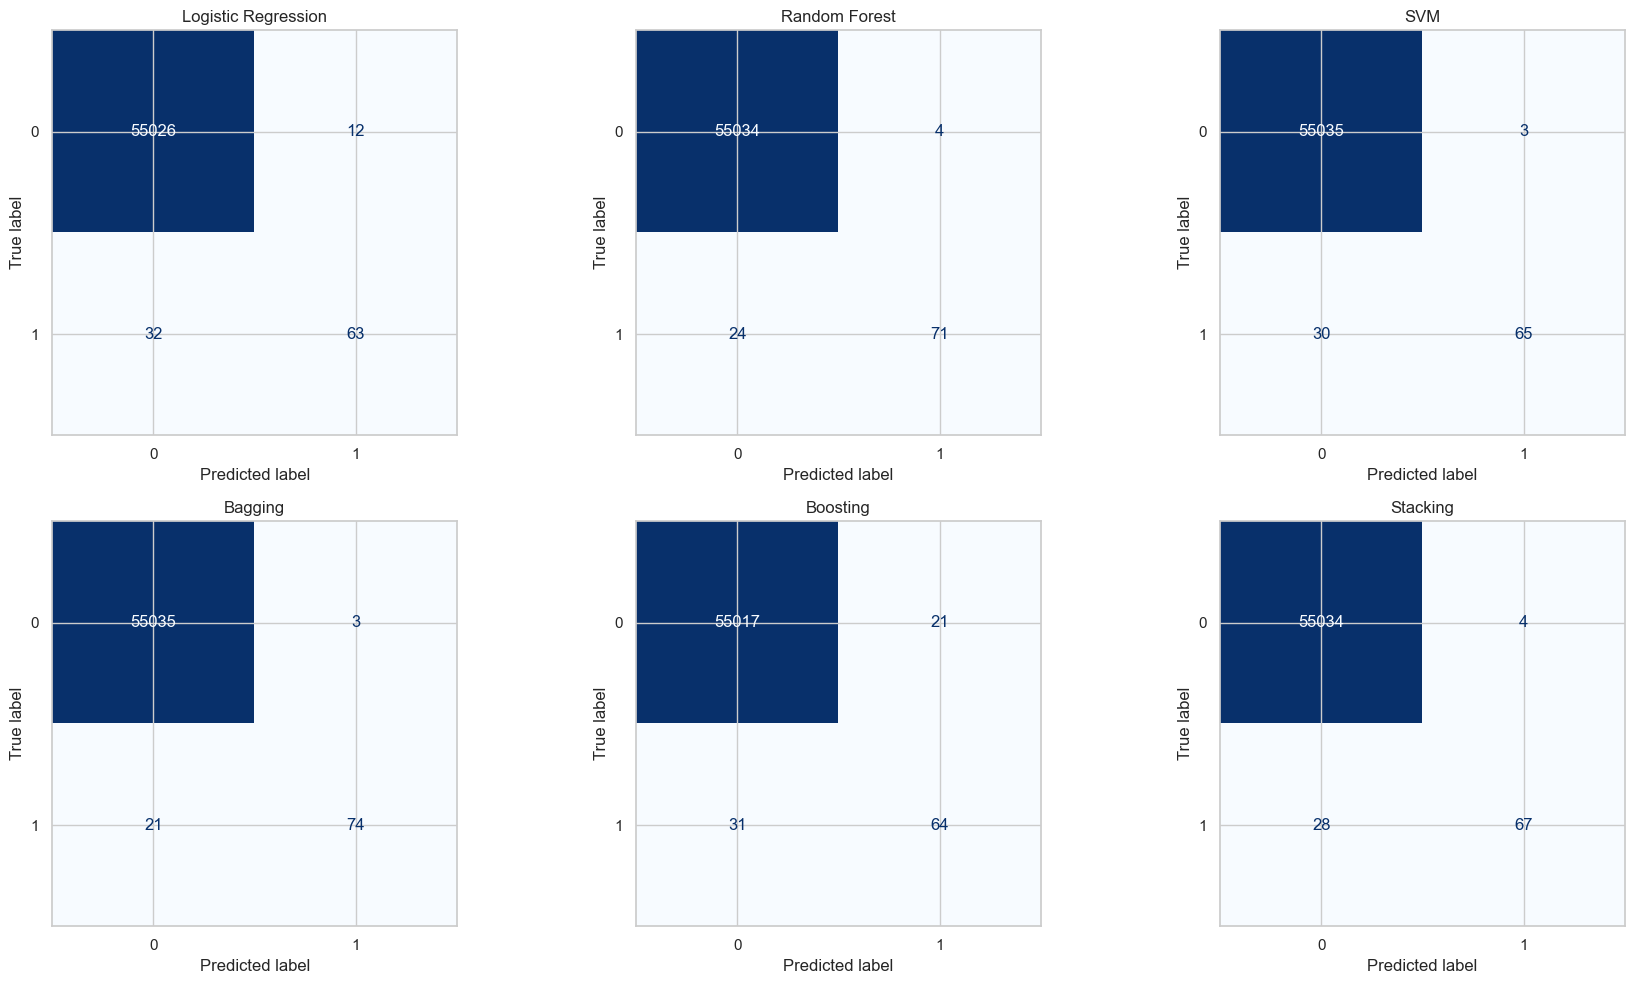

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay

model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Bagging', 'Boosting', 'Stacking']
model_preds = [
    c.predict(X_test),
    rf.predict(X_test),
    svm_model.predict(X_test),
    bagging.predict(X_test),
    boosting.predict(X_test),
    stacking.predict(X_test)
]

plt.figure(figsize=(18, 10))
for i, (name, preds) in enumerate(zip(model_names, model_preds)):
    plt.subplot(2, 3, i + 1)
    ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=plt.gca(), colorbar=False, cmap='Blues')
    plt.title(name)
plt.tight_layout()
plt.show()